# Data Mining Assignment


Dataset from kaggle :https://www.kaggle.com/ninzaami/loan-predication

First data is cleaned


In [168]:
# importing required libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [169]:
# importing or loading the dataset 
data = pd.read_csv('./bank-loan2 (1)/madfhantr.csv') 

# # distributing the dataset into two components X and Y 
# X = dataset.iloc[:, 0:13].values 
# y = dataset.iloc[:, 13].values 

In [170]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [171]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


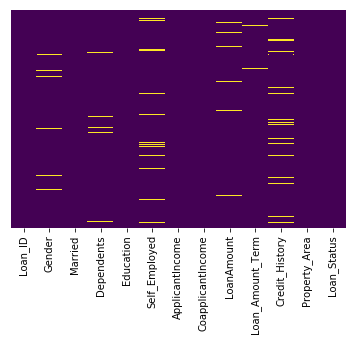

In [173]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [174]:
data.shape

(614, 13)

In [175]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [176]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [177]:
#Converting NOminal data to Integer

#Married with 0, not married =1
data.loc[data['Married'] =="Yes", 'Married'] = 0
data.loc[data['Married'] =="No", 'Married'] = 1

#Graduate with 0, Not Graduate =1
data.loc[data['Education'] =="Graduate", 'Education'] = 0
data.loc[data['Education'] =="Not Graduate", 'Education'] = 1

#SElf emplyed with 0, Not self employed =1
data.loc[data['Self_Employed'] =="Yes", 'Self_Employed'] = 0
data.loc[data['Self_Employed'] =="No", 'Self_Employed'] = 1

#Urban with 0,semiurban =1 rural=2
data.loc[data['Property_Area'] =="Urban", 'Property_Area'] = 0
data.loc[data['Property_Area'] =="Semiurban", 'Property_Area'] = 1
data.loc[data['Property_Area'] =="Rural", 'Property_Area'] = 2

#Output is Loan Status Y=1,N=0
data.loc[data['Loan_Status'] =="Y", 'Loan_Status'] = 1
data.loc[data['Loan_Status'] =="N", 'Loan_Status'] = 0


In [178]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,1,0,0,1,5849,0.0,NaN,360.0,1.0,0,1
1,LP001003,Male,0,1,0,1,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,Male,0,0,0,0,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,Male,0,0,1,1,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,Male,1,0,0,1,6000,0.0,141.0,360.0,1.0,0,1


In [179]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

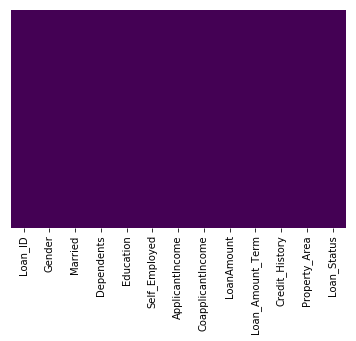

In [128]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [180]:
#Dealing With Null values
data.loc[pd.isnull(data['Gender']), 'Gender'] = 0
data.loc[pd.isnull(data['Dependents']),'Dependents']=0
data.loc[pd.isnull(data['Self_Employed']),'Self_Employed']=1
data.loc[pd.isnull(data['LoanAmount']),'LoanAmount']=146
data.loc[pd.isnull(data['Credit_History']),'Credit_History']=1
data.loc[pd.isnull(data['Loan_Amount_Term']),'Loan_Amount_Term']=342


In [181]:
data['Loan_Amount_Term'].mean()

342.0

In [182]:
data['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

## PCA process begins

In [183]:
X=data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

In [184]:
Y=data['Loan_Status']

In [185]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,146.0
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0


# Step 1 Standardisation

In [186]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

# Covariance Matrix

In [187]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00163132 -0.1167948   0.56654359]
 [-0.1167948   1.00163132  0.1881694 ]
 [ 0.56654359  0.1881694   1.00163132]]


In [188]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00163132 -0.1167948   0.56654359]
 [-0.1167948   1.00163132  0.1881694 ]
 [ 0.56654359  0.1881694   1.00163132]]


In [189]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.66026884  0.69112503 -0.29392389]
 [ 0.32044857  0.09469654  0.94252071]
 [-0.67923323  0.71650454  0.15894485]]

Eigenvalues 
[0.36213127 1.57297655 1.06978615]


In [190]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.66026884  0.69112503 -0.29392389]
 [ 0.32044857  0.09469654  0.94252071]
 [-0.67923323  0.71650454  0.15894485]]

Eigenvalues 
[0.36154148 1.57041469 1.06804383]


In [191]:
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.66026884  0.69112503 -0.29392389]
 [ 0.32044857  0.09469654  0.94252071]
 [-0.67923323  0.71650454  0.15894485]]

Eigenvalues 
[0.36154148 1.57041469 1.06804383]


# Singular Vector Decomposition

In [192]:
u,s,v = np.linalg.svd(X_std.T)
u

array([[-0.69112503,  0.29392389, -0.66026884],
       [-0.09469654, -0.94252071, -0.32044857],
       [-0.71650454, -0.15894485,  0.67923323]])

# 2 - Selecting Principal Components

In [193]:
for ev in eig_vecs:
    np.testing.assert_arraya_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [194]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.5704146939633337
1.0680438291274916
0.3615414769091758


In [233]:
from plotly.offline import plot

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,4)],
    y=var_exp,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,4)], 
    y=cum_var_exp,
    name='Cumulative'
)

Data = [trace1, trace2]

layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ])
)

fig = dict(data=Data, layout=layout)
plot(fig,filename='selecting-principal-components')

/home/ishdutt/anaconda3/lib/python3.6/site-packages/plotly/offline/offline.py:562: UserWarning:

Your filename `selecting-principal-components` didn't end with .html. Adding .html to the end of your file.



'selecting-principal-components.html'

In [156]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), 
                      eig_pairs[1][1].reshape(3,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.69112503 -0.29392389]
 [ 0.09469654  0.94252071]
 [ 0.71650454  0.15894485]]


# 3 - Projection Onto the New Feature Space

In [216]:
Ynew = X_std.dot(matrix_w)


In [228]:
Ynew

array([[-0.0054532 , -0.54482176],
       [-0.25354745, -0.0318228 ],
       [-1.0106645 , -0.55906813],
       ...,
       [ 1.16704298, -0.37195883],
       [ 0.54072816, -0.55070878],
       [-0.25972294, -0.50846881]])

In [218]:
colors = {'ApplicantIncome': '#0D76BF', 
          'CoapplicantIncome': '#00cc96', 
          'LoanAmount': '#EF553B'}


finaldata = []

for name, col in zip(('ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'), colors.values()):
    trace = dict(
        type='scatter',
        x=Ynew[Y==name,0],
        y=Ynew[Y==name,1],
        mode='markers',
        name=name,
        marker=dict(
            color=col,
            size=12,
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8)
    )
    print(name)
    finaldata.append(trace)

layout = dict(
    showlegend=True,
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2')
    )
)

fig = dict(data=finaldata, layout=layout)
plot(fig, filename='projection-matrix.html')

/home/ishdutt/anaconda3/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



ApplicantIncome
CoapplicantIncome
LoanAmount


'projection-matrix.html'

# Using Lib

In [206]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [210]:
libdata = []

for name, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), colors.values()):

    trace = dict(
        type='scatter',
        x=Y_sklearn[Y==name,0],
        y=Y_sklearn[Y==name,1],
        mode='markers',
        name=name,
        marker=dict(
            color=col,
            size=12,
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8)
    )
    libdata.append(trace)

layout = dict(
        xaxis=dict(title='PC1', showline=False),
        yaxis=dict(title='PC2', showline=False)
)
fig = dict(data=libdata, layout=layout)
plot(fig, filename='pca-scikitlearn')


/home/ishdutt/anaconda3/lib/python3.6/site-packages/plotly/offline/offline.py:562: UserWarning:

Your filename `pca-scikitlearn` didn't end with .html. Adding .html to the end of your file.



'pca-scikitlearn.html'

In [220]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

NameError: name 'transformed' is not defined